In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

We have 
$$
C(0) = S(0)\Phi(d_1) - K e^{-rt}\Phi(d_2)
$$
where, 
$d_1 = \frac{\log\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)t}{\sigma\sqrt(t)}$ and $d_2 = d_1 - \sigma\sqrt{t}$

Therefore,
$$
\frac{\partial C(0)}{\partial S(0)} = \Phi(d_1); \hspace{10pt}
\frac{\partial C(0)}{\partial t} = Ke^{-rt}\left(r\Phi(d_2) + \phi(d_2)\frac{\sigma}{2\sqrt{t}}\right)
$$

And thus, using the call put parity we have,
$$
P(0) = C(0) - S(0) + Ke^{-rt}
$$
which finally gives us
$$
\frac{\partial P(0)}{\partial S(0)} = -\Phi(-d_1); \hspace{10pt}
\frac{\partial P(0)}{\partial t} = Ke^{-rt}\left(\phi(d_2)\frac{\sigma}{2\sqrt{t}}-r\Phi(-d_2)\right)
$$

In [2]:
def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)

def d_bs_call_dS(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the derivative of the Black-Scholes value of a European call option w.r.t the current asset price
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        derivative of Call option price w.r.t. S0
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.cdf(d1)

def d_bs_call_dt(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the derivative of the Black-Scholes value of a European call option w.r.t the time to expire
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        derivative of Call option price w.r.t. the time to expire
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return K*np.exp(-r*t)*(r*norm.cdf(d2) + norm.pdf(d2)*sigma*0.5/np.sqrt(t))


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)

def d_bs_put_dS(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the derivative of the Black-Scholes value of a European put option w.r.t. the current asset price
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        derivative of Put option price w.r.t. the current asset price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return -norm.cdf(-d1)

def d_bs_put_dt(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the derivative of the Black-Scholes value of a European put option w.r.t. time to expire
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        derivative of Put option price w.r.t. time to expire
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -r*K*np.exp(-r*t)*norm.cdf(-d2) + K*np.exp(-r*t)*norm.pdf(d2)*0.5*sigma/np.sqrt(t)


The expected call value looks like a parabolic function in terms of the time to expire and hence it makes sense that $\partial_t C(0)$ goes down as $t$ increases. It tells us that as the time to expiration goes further away into the future, the sensitivity of $C(0)$ gradually wears down

Text(0.5, 0, 't (time to expiration)')

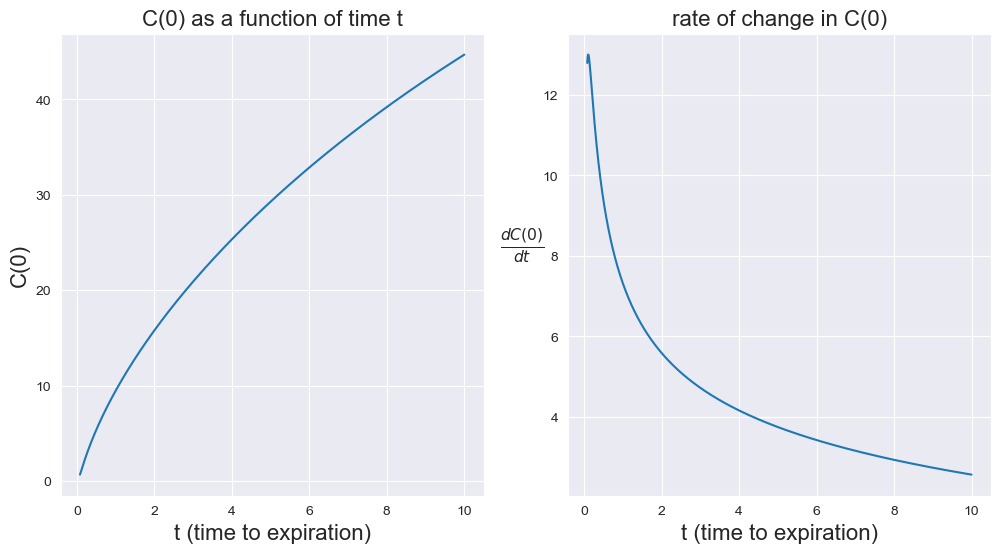

In [3]:
S0 = 100
K = 110
sigma = .3
r = 0.035
times = np.linspace(1/12, 10, 1000)
call_prices = [bs_call(S0,K,sigma, t = times[i], r = r) for i in range(len(times))]
call_prices_dt = [d_bs_call_dt(S0,K,sigma, t = times[i], r = r) for i in range(len(times))]


fig, axes = plt.subplots(1,2 , figsize = (12,6))

axes[0].plot(times, call_prices)
axes[0].set_title('C(0) as a function of time t', fontsize = 16)
axes[0].set_ylabel('C(0)', fontsize = 16)
axes[0].set_xlabel('t (time to expiration)', fontsize = 16)

axes[1].plot(times, call_prices_dt)
axes[1].set_title('rate of change in C(0)', fontsize = 16)
axes[1].set_ylabel('$\\frac{dC(0)}{dt}$', fontsize = 16, 
                   rotation = 0, labelpad = 15)
axes[1].set_xlabel('t (time to expiration)', fontsize = 16)


In $\frac{\partial C(0)}{\partial S(0)}$ is mostly dominated by the linear term $S(0)$ and hence the curve $C(0)$ looks almost linear in terms of $S(0)$ in the long run and its slope gets closer and closer to 1. This shows the expected value of the call option would keep on increasing as the current value of the asset goes up.

Text(0.5, 0, 'S(0)')

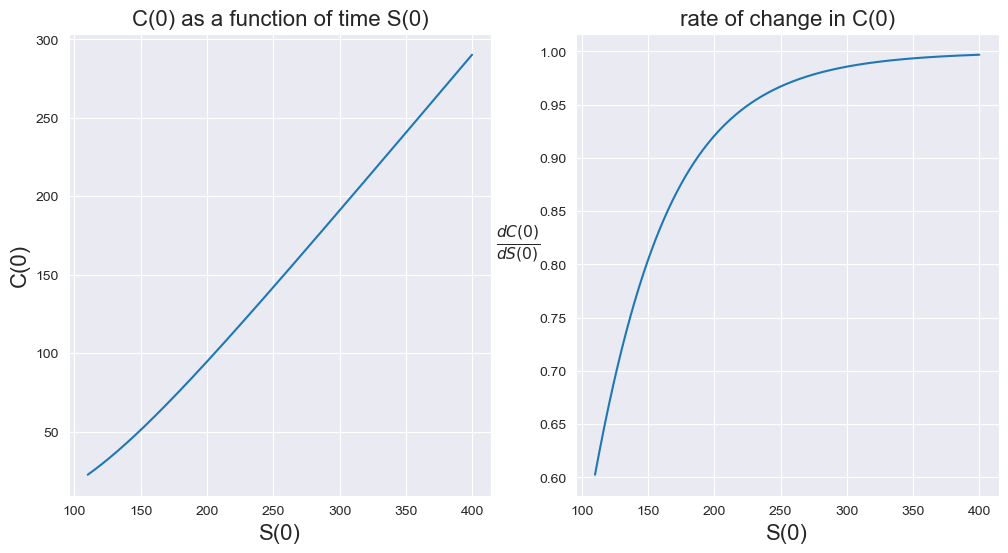

In [4]:
t = 3
K = 110
r = 0.0
sigma = .3
spot_prices = np.linspace(110, 400, 1000)
call_prices = [bs_call(S0,K,sigma, t) for S0 in spot_prices]
call_prices_dS= [d_bs_call_dS(S0,K,sigma, t = t, r = r) for S0 in spot_prices]


fig, axes = plt.subplots(1,2 , figsize = (12,6))

axes[0].plot(spot_prices, call_prices)
axes[0].set_title('C(0) as a function of time S(0)', fontsize = 16)
axes[0].set_ylabel('C(0)', fontsize = 16)
axes[0].set_xlabel('S(0)', fontsize = 16)

axes[1].plot(spot_prices, call_prices_dS)
axes[1].set_title('rate of change in C(0)', fontsize = 16)
axes[1].set_ylabel('$\\frac{dC(0)}{dS(0)}$', fontsize = 16, 
                   rotation = 0, labelpad = 15)
axes[1].set_xlabel('S(0)', fontsize = 16)

The value of the put option in terms of time reaches its maxima at around 8 years for the following setup and then it gradually goes down and hence gradually the slope converges to 0.

Text(0.5, 0, 't (time to expiration)')

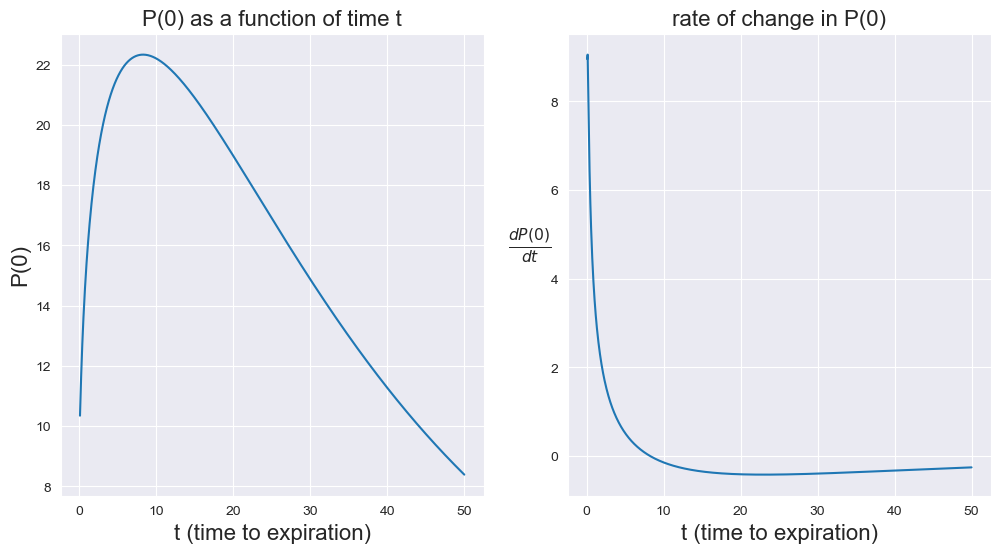

In [7]:
S0 = 100
K = 110
sigma = .3
r = 0.035
times = np.linspace(1/12, 50, 1000)
put_prices = [bs_put(S0,K,sigma, t = times[i], r = r) for i in range(len(times))]
# call_prices = np.array([bs_call(S0,K,sigma, t = times[i], r = r) for i in range(len(times))])
# put_prices = call_prices - S0 + K*np.exp(-r*times)
put_prices_dt = [d_bs_put_dt(S0,K,sigma, t = times[i], r = r) for i in range(len(times))]


fig, axes = plt.subplots(1,2 , figsize = (12,6))

axes[0].plot(times, put_prices)
axes[0].set_title('P(0) as a function of time t', fontsize = 16)
axes[0].set_ylabel('P(0)', fontsize = 16)
axes[0].set_xlabel('t (time to expiration)', fontsize = 16)

axes[1].plot(times, put_prices_dt)
axes[1].set_title('rate of change in P(0)', fontsize = 16)
axes[1].set_ylabel('$\\frac{dP(0)}{dt}$', fontsize = 16, 
                   rotation = 0, labelpad = 15)
axes[1].set_xlabel('t (time to expiration)', fontsize = 16)


Predictably, we see that the value of the put option goes down as the value of the current asset goes up and thus its slop gradually reaches 0 for very high values of $S(0)$.

Text(0.5, 0, 'S(0)')

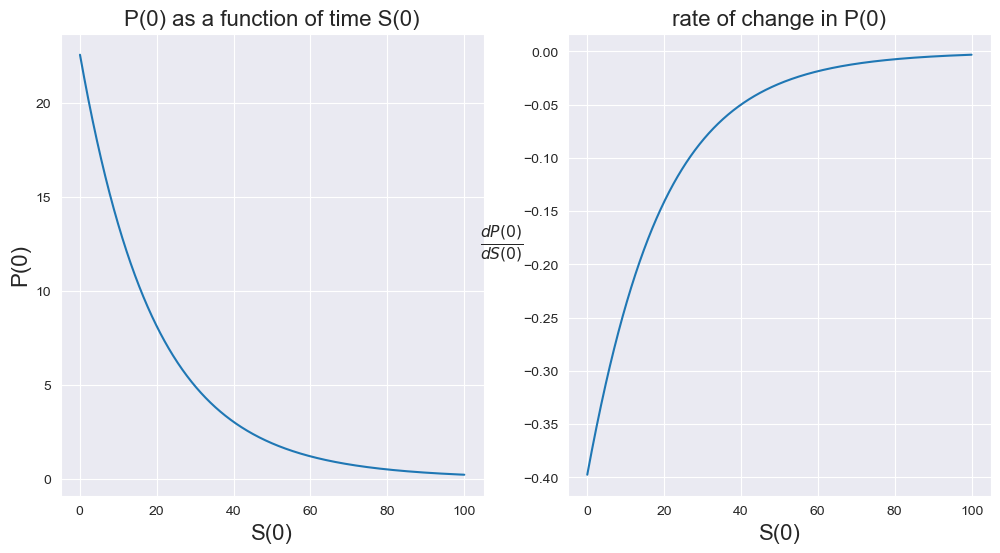

In [77]:
t = 3
K = 110
r = 0.0
sigma = .3
spot_prices = np.linspace(110, 400, 1000)
put_prices = [bs_put(S0,K,sigma, t) for S0 in spot_prices]
put_prices_dS= [d_bs_put_dS(S0,K,sigma, t = t, r = r) for S0 in spot_prices]


fig, axes = plt.subplots(1,2 , figsize = (12,6))

axes[0].plot(times, put_prices)
axes[0].set_title('P(0) as a function of time S(0)', fontsize = 16)
axes[0].set_ylabel('P(0)', fontsize = 16)
axes[0].set_xlabel('S(0)', fontsize = 16)

axes[1].plot(times, put_prices_dS)
axes[1].set_title('rate of change in P(0)', fontsize = 16)
axes[1].set_ylabel('$\\frac{dP(0)}{dS(0)}$', fontsize = 16, 
                   rotation = 0, labelpad = 15)
axes[1].set_xlabel('S(0)', fontsize = 16)
